# 单变量线性回归

吴明晖

浙江大学城市学院

2020.2

<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#使用Tensorflow进行算法设计与训练的核心步骤" data-toc-modified-id="使用Tensorflow进行算法设计与训练的核心步骤-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>使用Tensorflow进行算法设计与训练的核心步骤</a></span></li><li><span><a href="#Tensorflow实现单变量线性回归" data-toc-modified-id="Tensorflow实现单变量线性回归-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tensorflow实现单变量线性回归</a></span><ul class="toc-item"><li><span><a href="#生成数据" data-toc-modified-id="生成数据-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>生成数据</a></span></li><li><span><a href="#构建模型" data-toc-modified-id="构建模型-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>构建模型</a></span></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>训练模型</a></span></li><li><span><a href="#进行预测" data-toc-modified-id="进行预测-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>进行预测</a></span></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>小结</a></span></li></ul></div>

# 使用Tensorflow进行算法设计与训练的核心步骤

- ** （1）准备数据 **
- ** （2）构建模型 **
- ** （3）训练模型 **
- ** （4）进行预测 **

上述步骤是我们使用Tensorflow进行算法设计与训练的核心步骤，贯穿于后面介绍的具体实战中。<br> 本章用一个简单的例子来讲解这几个步骤。



# 有监督机器学习过程示意图

![机器学习过程示意图](机器学习过程示意图.png)

# Tensorflow实现单变量线性回归

假设我们要学习的函数为线性函数$ y=2x+1 $

## 生成数据

### 导入相关库

In [2]:
import tensorflow as tf    # 载入Tensorflow
import numpy as np     # 载入numpy
import matplotlib.pyplot as plt # 载入matplotlib

# 在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会在网页里显示图像
%matplotlib inline
print("Tensorflow版本是：",tf.__version__) #显示当前TensorFlow版本

Tensorflow版本是： 2.0.0


## 生成数据集

** 首先，生成输入数据。 ** <br> 我们需要构造满足这个函数的$x$和$y$同时加入一些不满足方程的噪声.

In [3]:
# 直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间
x_data = np.linspace(-1, 1, 100) 

np.random.seed(5)    # 设置随机数种子
# y = 2x +1 + 噪声， 其中，噪声的维度与x_data一致
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4  

In [4]:
# numpy.random.randn(d0, d1, …, dn) 是从标准正态分布中返回一个或多个样本值
# 标准正态分布又称为u分布，是以0为均值、以1为标准差的正态分布，记为N（0，1）

np.random.randn(10)

array([ 0.79242262,  0.17076445, -1.75374086,  0.63029648,  0.49832921,
        1.01813761, -0.84646862,  2.52080763, -1.23238611,  0.72695326])

In [5]:
# x_data.shape值为一个元组

x_data.shape

(100,)

In [6]:
# 实参的前面加上*和**时，就意味着拆包。单个*表示将元组拆成一个个单独的实参

np.random.randn(*x_data.shape)

array([ 0.04595522, -0.48713265,  0.81613236, -0.28143012, -2.33562182,
       -1.16727845,  0.45765807,  2.23796561, -1.4812592 , -0.01694532,
        1.45073354,  0.60687032, -0.37562084, -1.42192455, -1.7811513 ,
       -0.74790579, -0.36840953, -2.24911813, -1.69367504,  0.30364847,
       -0.40899234, -0.75483059, -0.40751917, -0.81262476,  0.92751621,
        1.63995407,  2.07361553,  0.70979786,  0.74715259,  1.46309548,
        1.73844881,  1.46520488,  1.21228341, -0.6346525 , -1.5996985 ,
        0.87715281, -0.09383245, -0.05567103, -0.88942073, -1.30095145,
        1.40216662,  0.46510099, -1.06503262,  0.39042061,  0.30560017,
        0.52184949,  2.23327081, -0.0347021 , -1.27962318,  0.03654264,
       -0.64635659,  0.54856784,  0.21054246,  0.34650175, -0.56705117,
        0.41367881, -0.51025606,  0.51725935, -0.30100513, -1.11840643,
        0.49852362, -0.70609387,  1.4438811 ,  0.44295626,  0.46770521,
        0.10134479, -0.05935198, -2.38669774,  1.22217056, -0.81

In [7]:
# 本例中，np.random.randn(*x_data.shape) 和 np.random.randn(100) 功能相同

np.random.randn(100)

array([-1.02957349, -1.33628031, -0.61056736,  0.52469426, -0.34930813,
       -0.44073846, -1.1212876 ,  1.47284473, -0.62337224, -1.08070195,
       -0.12253009, -0.8077431 , -0.23255622,  1.33515034, -0.44645673,
       -0.04978868, -0.36854478, -0.19173957,  0.81967992,  0.53163372,
       -0.34161504, -0.93090048, -0.13421699,  0.83259361, -0.01735327,
       -0.12765822, -1.80791662,  0.99396898, -1.49112886, -1.28210748,
       -0.37570741,  0.03464388,  0.04507816, -0.76374689, -0.31313851,
       -0.60698954, -1.80955123, -0.25551774, -0.69379935,  0.41919776,
       -0.14520019,  0.9638013 ,  0.69622199,  0.89940546,  1.20837807,
        0.6932537 , -0.16636061,  1.35311311, -0.92862651, -0.03547249,
        0.85964595, -0.28749661,  0.71494995, -0.8034526 , -0.54048196,
        0.54617743,  0.71188926,  1.19715449, -0.07006703,  0.29822712,
        0.62619261,  0.46743206, -1.30262143, -0.57008965,  1.44295001,
       -1.24399513,  0.62888033, -0.42559213,  1.00320956, -0.77

In [8]:
y_data = 2 * x_data + 1.0 + np.random.randn(100) * 0.4  # y = 2x +1 + 噪声， 其中，噪声的维度与x_data一致

### Jupyter使用小技巧
可以使用Tab健进行代码补齐

## 查看数据集

In [5]:
x_data,y_data

(array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
        -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
        -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
        -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
        -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
        -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
        -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
        -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
        -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
        -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
         0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
         0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
         0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
         0.31313131,  0.33333333,  0.35353535,  0.3

** 利用matplotlib画图 **

Text(0.5, 1.0, 'Figure: Training Data')

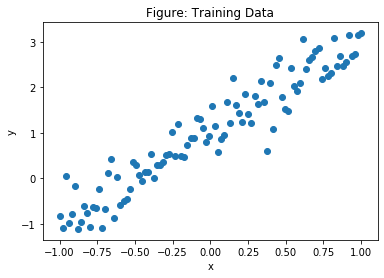

In [8]:
#画出随机生成数据的散点图
plt.scatter(x_data, y_data) 
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure: Training Data")

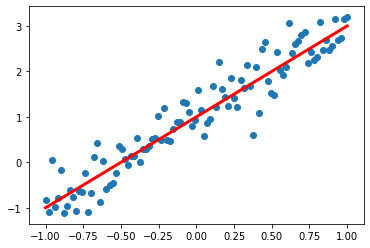

In [9]:
#画出随机生成数据的散点图
plt.scatter(x_data, y_data) 

# 画出我们想要通过学习得到的目标线性函数 y = 2x +1
plt.plot (x_data, 1.0 + 2 * x_data,  'r',linewidth=3) 

In [11]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

## 构建模型

** 构建回归模型 **

In [10]:
# 通过模型执行，将实现前向计算（预测计算）

def model(x, w, b):
    return tf.multiply(x, w) + b 

** 创建变量 **
<br>
- Tensorflow变量的声明函数是tf.Variable
- tf.Variable的作用是保存和更新参数
- 变量的初始值可以是随机数、常数，或是通过其他变量的初始值计算得到

In [11]:
# 构建模型中的变量w，对应线性函数的斜率
w = tf.Variable(np.random.randn(),tf.float32)

# 构建模型中的变量b，对应线性函数的截距
b = tf.Variable(0.0,tf.float32)   

## 定义损失函数 

- 损失函数用于描述预测值与真实值之间的误差，从而指导模型收敛方向
- 常见损失函数：均方差（Mean Square Error, MSE）和交叉熵（cross-entropy）

In [12]:
# 定义均方差损失函数

def loss(x, y, w, b):
    err = model(x, w, b) - y    #  计算模型预测值和标签值的差异
    squared_err = tf.square(err)    #  求平方，得出方差
    return tf.reduce_mean(squared_err)   # 求均值，得出均方差.

## 训练模型

### 设置训练超参数 

In [13]:
training_epochs = 10    # 迭代次数（训练轮数）
learning_rate = 0.01    # 学习率

** 关于学习率（learning_rate）的设置 **<br>
- 学习率的作用：控制参数更新的幅度。
- 如果学习率设置过大，可能导致参数在极值附近来回摇摆，无法保证收敛。
- 如果学习率设置过小，虽然能保证收敛，但优化速度会大大降低，我们需要更多迭代次数才能达到较理想的优化效果。

### 定义计算梯度函数

In [14]:
# 计算样本数据[x,y]在参数[w,b]点上的梯度
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])    # 返回梯度向量

### 执行训练 （SGD）

Training Epoch: 01 Step: 010 loss=0.014715
Training Epoch: 01 Step: 020 loss=0.253290
Training Epoch: 01 Step: 030 loss=0.143054
Training Epoch: 01 Step: 040 loss=1.389589
Training Epoch: 01 Step: 050 loss=0.382215
Training Epoch: 01 Step: 060 loss=0.642117
Training Epoch: 01 Step: 070 loss=1.355959
Training Epoch: 01 Step: 080 loss=0.618715
Training Epoch: 01 Step: 090 loss=0.275236
Training Epoch: 01 Step: 100 loss=0.877006
Training Epoch: 02 Step: 110 loss=0.614993
Training Epoch: 02 Step: 120 loss=0.005396
Training Epoch: 02 Step: 130 loss=0.029839
Training Epoch: 02 Step: 140 loss=0.387822
Training Epoch: 02 Step: 150 loss=0.002012
Training Epoch: 02 Step: 160 loss=0.045372
Training Epoch: 02 Step: 170 loss=0.332095
Training Epoch: 02 Step: 180 loss=0.049918
Training Epoch: 02 Step: 190 loss=0.000254
Training Epoch: 02 Step: 200 loss=0.258763
Training Epoch: 03 Step: 210 loss=0.330364
Training Epoch: 03 Step: 220 loss=0.000476
Training Epoch: 03 Step: 230 loss=0.024453
Training Ep

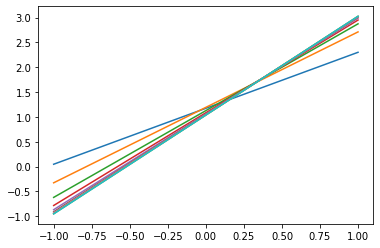

In [15]:
step = 0    # 记录训练步数
loss_list = []    # 用于保存loss值的列表
display_step = 10    # 控制训练过程数据显示的频率，不是超参数

for epoch in range(training_epochs):
    for xs,ys in zip(x_data, y_data):
        
        loss_ = loss(xs, ys, w, b)    # 计算损失
        loss_list.append(loss_)    # 保存本次损失计算结果
        
        delta_w, delta_b = grad(xs, ys, w, b)    # 计算该当前[w,b]点的梯度
        change_w = delta_w * learning_rate    # 计算变量w需要调整的量
        change_b = delta_b * learning_rate    # 计算变量b需要调整的量
        w.assign_sub(change_w) # 变量w值变更为减去chage_w后的值
        b.assign_sub(change_b) # 变量b值变更为减去chage_b后的值
               
        step=step+1    # 训练步数+1
        if step % display_step == 0:    # 显示训练过程信息
            print("Training Epoch:", '%02d' % (epoch+1), "Step: %03d" % (step),"loss=%.6f" % (loss_))
    plt.plot(x_data, w.numpy() * x_data + b.numpy())    # 完成一轮训练后，画出回归的线条        

从上图可以看出，由于本案例所拟合的模型较简单，训练5次之后已经接近收敛。<br> 对于复杂模型，需要更多次训练才能收敛。

### 显示训练结果

In [16]:
print ("w：", w.numpy()) # w的值应该在2附近 
print ("b：", b.numpy()) # b的值应该在1附近 

w： 1.99055
b： 1.0367402


### 结果可视化

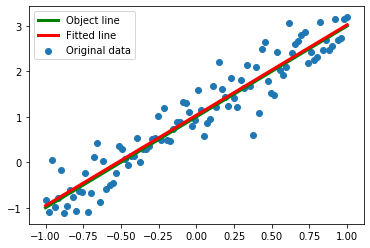

In [21]:
plt.scatter(x_data,y_data,label='Original data')
plt.plot (x_data, x_data * 2.0 + 1.0, label='Object line',color='g', linewidth=3)
plt.plot (x_data, x_data * w.numpy() + b.numpy(),label='Fitted line',color='r', linewidth=3)
plt.legend(loc=2)# 通过参数loc指定图例位置

## 进行预测

In [27]:
x_test = 3.21

predict = model(x_test,w.numpy(),b.numpy())
print("预测值：%f" % predict)

target = 2 * x_test + 1.0
print("目标值：%f" % target)

预测值：7.426406
目标值：7.420000


### 查看损失变化情况

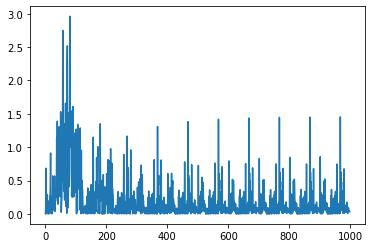

In [17]:
plt.plot(loss_list)

** 以上是利用Tensorflow训练一个线性模型并进行预测的完整过程。<br> 通过逐渐降低损失值loss来训练参数$w$和$b$拟合 $y = 2x + 1$中的系数2和1。 ** 

# 小结

** 通过一个简单的例子介绍了利用Tensorflow实现机器学习的思路，重点讲解了下述步骤： ** <br>
** - （1）生成人工数据集及其可视化 ** <br>
** - （2）构建线性模型 **<br>
** - （3）定义损失函数 **<br>
** - （4）最小化损失函数 **<br>
** - （5）训练结果的可视化 **<br>
** - （6）利用学习到的模型进行预测 **

